<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with TensorFlow


---

<a id="learning-objectives"></a>
### Learning Objectives
- Get a quick overview of TensorFlow
- Build a linear regression in TensorFlow
- Tune our approach to linear regression to make it more efficient
- Build a Multilayer Perceptron feed-forward network

### Lesson Guide

- [Common Neural Net libraries in Python](#common-neural-net-libraries-in-python)
- [Codealong: Linear Models in TensorFlow](#codealong-linear-models-in-tensorflow)
	- [Setup parameters and data that we will use later](#setup-parameters-and-data-that-we-will-use-later)
	- [Create tensors that correspond to our data](#create-tensors-that-correspond-to-our-data)
	- [Create weights to use in our model](#create-weights-to-use-in-our-model)
	- [Define a linear equation](#define-a-linear-equation)
	- [Define a loss function](#define-a-loss-function)
	- [Instantiate an optimizer](#instantiate-an-optimizer)
	- [Time to train our linear regression/neural network](#time-to-train-our-linear-regressionneural-network)
	- [Great, we've got a linear model, but there are still a few things we can improve](#great-weve-got-a-linear-model-but-there-are-still-a-few-things-we-can-improve)
	- [An example with real data](#an-example-with-real-data)
	- [Create tensors that correspond to our data](#create-tensors-that-correspond-to-our-data)
	- [Create weights to use in our model](#create-weights-to-use-in-our-model)
	- [Create model, loss function, and optimizer](#create-model-loss-function-and-optimizaer)
	- [Scale our data](#scale-our-data)
	- [Train our network on the Boston data](#train-our-network-on-the-boston-data)
	- [Plot MSE over Epochs](#plot-mse-over-epochs)
- [Train a Multilayer Perceptron on the Titanic data](#train-a-multilayer-perceptron-on-the-titanic-data)
	- [Load in the titanic data](#load-in-the-titanic-data)
	- [Do a bit of data cleaning](#do-a-bit-of-data-cleaning)
	- [Create tensors](#create-tensors)
	- [Create weights](#create-weights)
	- [Create the structure of the Multilayer Perceptron network](#create-the-structure-of-the-multilayer-perceptron-network)
	- [Define loss function](#define-loss-function)
	- [Define optimizer](#define-optimizer)
	- [Train the network](#train-the-network)
	- [A final example with more hidden layers](#a-final-example-with-more-hidden-layers)
- [Additional Resources](#additionl-resources)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4)
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import tensorflow as tf
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Imputer, LabelBinarizer, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, make_union
from sklearn.model_selection import train_test_split

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<a id="common-neural-net-libraries-in-python"></a>
## Common Neural Network libraries in Python
---

There are a number of libraries available for neural networks in Python, including:

- [Tensorflow](https://www.tensorflow.org/)
- [Caffe](http://caffe.berkeleyvision.org/)
- [Lasagne](https://lasagne.readthedocs.io/en/latest/)
- [Theano](http://deeplearning.net/software/theano/)
- [Keras](https://keras.io/)

We'll be using the Tensorflow library (by Google) in these examples, but the development environment is very open right now.

Tensorflow is a library which can do many things beyond neural networks. Its main purpose is to facilitate using more powerful tools like GPUs or distributing calculations across clusters. A particular ingredient is the organization of calculations into computational graphs. These graphs are set up in python and then passed over to C++ to do the calculations.

<a id="codealong-linear-models-in-tensorflow"></a>
## Codealong: Linear Models in TensorFlow
---

Haven't you ever wanted to get rid of those pesky linear models in sklearn? Let's replicate that effort using Tensorflow.

Tensorflow works by setting up `tensors`, which essentially hold numeric data of various shapes, and passes them through user-defined operations. The user-defined operations will be our Neural Network layers. When we initialize a session within Tensorflow, that starts the process of filling (or refilling) those tensors. You can imagine this system as actually setting up a set of calculations first and then filling them in with real data later.

**Tensors are a lot like vectors and matrices:**
- 0D Tensor = Scalar
- 1D Tensor = Vector
- 2D Tensor = Matrix
- 4D Tensor = ??


Starting with tensorflow involves a lot of different ingredients. Before setting up a neural network with tensorflow, we will see how tensorflow can be used to carry out a task like linear regression.

We will start with some generated data to show off the basic process and then use some real data to reinforce those lessons.

This section is adapted from [this example](https://github.com/ageron/handson-ml/blob/master/09_up_and_running_with_tensorflow.ipynb).

First we specify a few variables for tensorflow. We can give values to them and a name, and do mathematical operations with them. At this stage however no actual calculation is carried out.

In [3]:
x = tf.Variable(3,name='x')
y = tf.Variable(4,name='y')
f = x*x*y+y+2

In [4]:
x.value()

<tf.Tensor 'x/read:0' shape=() dtype=int32>

To calculate the last expression, we start a tensorflow session. Within this session, we initialize the variables, do the computations, evaluate the result and save it to a variable which we can still access once the tensorflow session is finished.

In [5]:
with tf.Session() as sess:
    
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

In [6]:
print(result)

42


We don't have to initialize all the variables separately,
but can do that for all of them at once.

In [7]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = f.eval()

print(result)

42


Another example:

In [8]:
w = tf.constant(3)
x = w+2
y = x+5
z = x*3

with tf.Session() as sess:
    init.run()
    print(y.eval())
    print(z.eval())

10
15


Before constructing neural networks, we are going to use tensorflow for doing standard linear regression.
Let's just get the sklearn result for reference first.

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['intercept'] = 1
target = boston.target

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression(fit_intercept=False)
model.fit(df,target)
print(model.coef_)
boston_mse = mean_squared_error(target,model.predict(df))
print(boston_mse)

[-1.0717e-01  4.6395e-02  2.0860e-02  2.6886e+00 -1.7796e+01  3.8048e+00
  7.5106e-04 -1.4758e+00  3.0566e-01 -1.2329e-02 -9.5346e-01  9.3925e-03
 -5.2547e-01  3.6491e+01]
21.8977792176875


Do the calculation with numpy using the formula

$$
\beta = \left(X^T X\right)^{-1}X^T y
$$

In [11]:
print(np.dot(np.dot(np.linalg.inv(np.dot(df.T,df)),df.T),target))

[-1.0717e-01  4.6395e-02  2.0860e-02  2.6886e+00 -1.7796e+01  3.8048e+00
  7.5106e-04 -1.4758e+00  3.0566e-01 -1.2329e-02 -9.5346e-01  9.3925e-03
 -5.2547e-01  3.6491e+01]


This will do the same using tensorflow:

In [12]:
X = tf.constant(df.values,dtype=tf.float64,name='X')
y = tf.constant(target.reshape(-1,1),dtype=tf.float64,name='y')
X_T = tf.transpose(X)
beta = tf.matmul(tf.matmul(
    tf.matrix_inverse(tf.matmul(X_T,X)),X_T),y)

with tf.Session() as sess:
    
    beta_value = beta.eval()

In [13]:
print(beta_value)

[[-1.0717e-01]
 [ 4.6395e-02]
 [ 2.0860e-02]
 [ 2.6886e+00]
 [-1.7796e+01]
 [ 3.8048e+00]
 [ 7.5106e-04]
 [-1.4758e+00]
 [ 3.0566e-01]
 [-1.2329e-02]
 [-9.5346e-01]
 [ 9.3925e-03]
 [-5.2547e-01]
 [ 3.6491e+01]]


### Another example

<a id="setup-parameters-and-data-that-we-will-use-later"></a>
### Setup parameters and data that we will use later

This section is taken from [this example](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb).

In [14]:
# Set up some parameters that we will use later

learning_rate = 0.01 # Size of Gradient Descent step
training_epochs = 20000 # How many times we'll iterate through the full set
display_step = 1000 # We want to see something every few steps

In [15]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [16]:
model = LinearRegression()
model.fit(train_X.reshape(-1,1),train_Y)
print(model.coef_, model.intercept_)
model_mse = mean_squared_error(train_Y,model.predict(train_X.reshape(-1,1)))
print(model_mse)

[0.2516] 0.798801226175389
0.153857674041911


<a id="create-tensors-that-correspond-to-our-data"></a>
### Create tensors that correspond to our data

In [17]:
X = tf.placeholder("float")
y = tf.placeholder("float")

<a id="create-weights-to-use-in-our-model"></a>
### Create weights to use in our model
- W will be the weight term, like the beta coefficient in a linear regression
- b will be the bias term like the constant in a linear regression

In [18]:
w = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

<a id="define-a-linear-equation"></a>
### Define a linear equation

We combine the weights, the inputs and the bias just as in linear regression.

$y = b + X w$

In [19]:
pred = tf.add(tf.multiply(X, w), b)

<a id="define-a-loss-function"></a>
### Define a loss function
- As in most machine learning models, we need some way to measure how close our predictions are to our actual values.
- In this case we use mean squared error, although the syntax may look a little foreign
- `reduce_mean` is the same as a `mean` in Python

In [20]:
error = pred - y
cost = tf.reduce_mean(tf.square(error),name='cost')
cost_history = []

So far we've written down the cost (loss) function that we want to minimize in our optimization problem:

$$\min_{w, b} {\|y - (Xw + b) \|}$$

This says that we want to find a set of $b$ and $w$ that makes the mean squared error on our training data as small as possible.

<a id="instantiate-an-optimizer"></a>
### Instantiate an optimizer
- We still need a way to solve for our weights $w$
- Tensorflow comes with several solvers to do the work for us

In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(cost)

<a id="time-to-train-our-linear-regressionneural-network"></a>
### Time to train our linear regression

- We instantiate a tensorflow session using `tf.Session()`
- Every few epochs we print out $b$, $w$ and the MSE to check how the computation proceeds.

In [22]:
# This initializes all the tensor flow variables 
# we have set up so far, i.e. b and w
init = tf.global_variables_initializer()

# This starts our tensor flow session
with tf.Session() as sess:
    sess.run(init)
    
    # Print results from every few epochs
    for epoch in range(training_epochs): 
        sess.run(training_op, feed_dict={X: train_X, y:train_Y})
        cost_history.append(sess.run(cost, feed_dict={X: train_X, y:train_Y}))
        
        if (epoch+1) % display_step == 0: 
            c = sess.run(cost, feed_dict={X: train_X, y:train_Y})
            print('Epoch:', '%04d' % (epoch+1), 'cost=', '{:9f}'.format(c), \
            "w=", sess.run(w), "b=", sess.run(b))
    
    print('Optimization finished')
    training_cost = sess.run(cost, feed_dict={X: train_X, y: train_Y})
    print("Training cost=", training_cost, "w=", sess.run(w), "b=", sess.run(b), '\n')
    
    pred_Y = sess.run(w) * train_X + sess.run(b)

Epoch: 1000 cost=  0.155951 w= 0.2699773 b= 0.668762
Epoch: 2000 cost=  0.153874 w= 0.25324878 b= 0.7873598
Epoch: 3000 cost=  0.153858 w= 0.25177693 b= 0.7977945
Epoch: 4000 cost=  0.153858 w= 0.2516474 b= 0.79871273
Epoch: 5000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epoch: 6000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epoch: 7000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epoch: 8000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epoch: 9000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epoch: 10000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epoch: 11000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epoch: 12000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epoch: 13000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epoch: 14000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epoch: 15000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epoch: 16000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epoch: 17000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epoch: 18000 cost=  0.153858 w= 0.25163665 b= 0.7987891
Epo

Let's check our predictions:

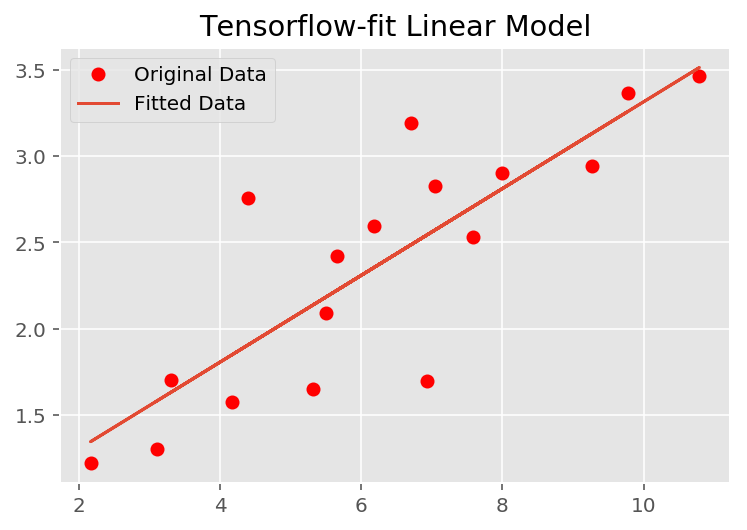

In [23]:
plt.plot(train_X, train_Y, 'ro', label='Original Data')
plt.plot(train_X, pred_Y, label='Fitted Data')
plt.title('Tensorflow-fit Linear Model')
plt.legend()
plt.show()

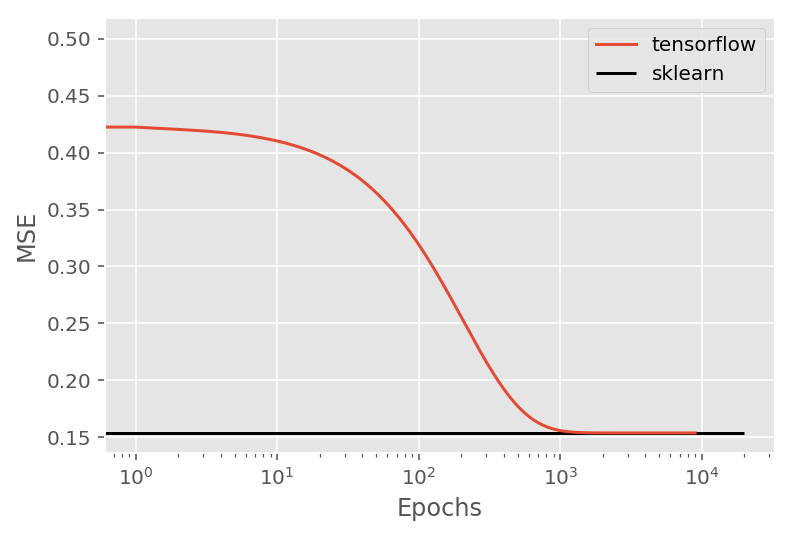

In [24]:
plt.plot(list(range(training_epochs))[:9000] , cost_history[:9000],label='tensorflow')
plt.hlines(model_mse,0,20000,label='sklearn')
plt.xscale('log')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

<a id="great-weve-got-a-linear-model-but-there-are-still-a-few-things-we-can-improve"></a>
### Great, we've got a linear model, but there are still a few things we can improve
- We need to extend this concept to multiple regression with several ws
- We can standardize the inputs to make it easier for the solver to find a solution

<a id="an-example-with-real-data"></a>
### An example with real data
- We'll use again the boston housing data set to implement multiple regression in TensorFlow

In [25]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [26]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
boston.target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

<a id="create-tensors-that-correspond-to-our-data"></a>
### Create tensors that correspond to our data
- We tell Tensorflow that our feature matrix has 13 features and our outcome has one vector
- We leave the number of observations open, it will be inferred from the data

In [28]:
X = tf.placeholder(tf.float32, shape=[None, df.shape[1]], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='Y')
n_samples = df.shape[0]

<a id="create-weights-to-use-in-our-model"></a>
### Create weights to use in our model


In [29]:
w = tf.Variable(tf.zeros([df.shape[1], 1]))
b = tf.Variable(tf.zeros([1]))

<a id="create-model-loss-function-and-optimizaer"></a>
### Create model, loss function and optimizer
- We will modify the model a little with matrix multiplication so we can use multiple ws

In [30]:
pred = tf.add(tf.matmul(X, w), b)

In [31]:
error = pred - Y
cost = tf.reduce_mean(tf.square(error))

In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(cost)

<a id="scale-our-data"></a>
### Scale our data
- Optimization problems tend to work best when all the numbers and derivatives are around the same magnitude
    - Neural Nets are especially sensitive to this
- We will use sklearn to standardize our data

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(df.values)
train_Y = boston.target.reshape(-1,1)

cost_history = []

<a id="train-our-network-on-the-boston-data"></a>
### Train our network on the Boston data

In [34]:
# Set up some parameters that we will use later

learning_rate = 0.01 # Size of Gradient Descent step
training_epochs = 20000 # How many times we'll iterate through the full set
display_step = 1000 # We want to see something every 50 steps

In [35]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs): 
        sess.run(training_op, feed_dict={X: train_X, Y:train_Y})
        cost_history.append(sess.run(cost, feed_dict={X: train_X, Y:train_Y}))
        
        if (epoch+1) % display_step == 0: 
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print('Epoch:', '%04d' % (epoch+1), 'cost=', '{:9f}'.format(c), \
            "w=", sess.run(w).reshape(train_X.shape[1],), "b=", sess.run(b), '\n')
            
    
    print('Optimization finished')
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, '\n', "intercept: ", sess.run(b)[0],'\n')
    weights = sess.run(w).reshape(train_X.shape[1],)
    
    for x in zip(df.columns, weights):
        print(x[0], ':', x[1])
        
    pred_y = sess.run(pred, feed_dict={X: train_X})
    mse = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
    print(("MSE: %.4f" % mse))

Epoch: 1000 cost= 21.956873 w= [-0.865   0.9846 -0.0924  0.7154 -1.9416  2.7341 -0.0271 -3.0557  2.0463
 -1.4119 -2.0259  0.857  -3.72  ] b= [22.5328] 

Epoch: 2000 cost= 21.902271 w= [-0.9079  1.059   0.0761  0.6917 -2.0457  2.6834  0.0104 -3.1074  2.49
 -1.8851 -2.0553  0.8555 -3.742 ] b= [22.5328] 

Epoch: 3000 cost= 21.898132 w= [-0.917   1.0749  0.1242  0.6849 -2.0567  2.6741  0.0182 -3.1058  2.6115
 -2.0222 -2.0604  0.8563 -3.7468] b= [22.5328] 

Epoch: 4000 cost= 21.897808 w= [-0.9195  1.0793  0.1377  0.683  -2.0592  2.6716  0.0203 -3.1048  2.6455
 -2.0608 -2.0617  0.8565 -3.7482] b= [22.5328] 

Epoch: 5000 cost= 21.897781 w= [-0.9201  1.0805  0.1415  0.6824 -2.0598  2.6709  0.0209 -3.1046  2.6551
 -2.0717 -2.062   0.8566 -3.7485] b= [22.5328] 

Epoch: 6000 cost= 21.897781 w= [-0.9203  1.0809  0.1425  0.6823 -2.06    2.6707  0.021  -3.1045  2.6577
 -2.0747 -2.0621  0.8566 -3.7486] b= [22.5328] 

Epoch: 7000 cost= 21.897781 w= [-0.9204  1.0809  0.1428  0.6822 -2.0601  2.6707  0.0

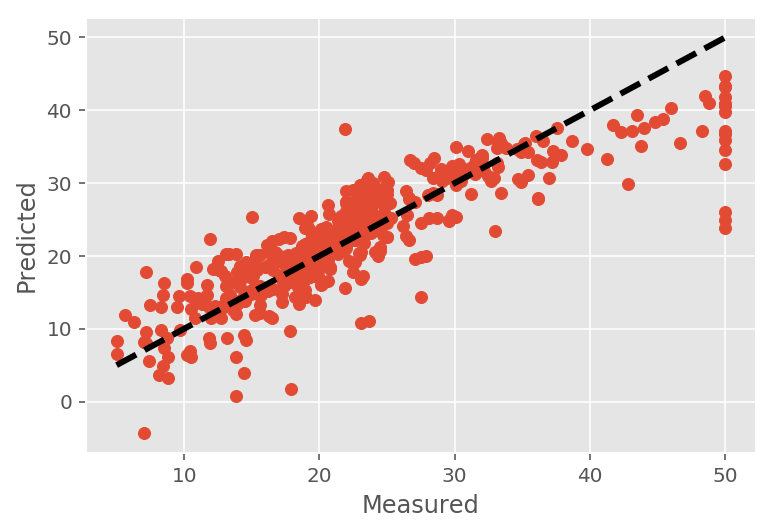

In [36]:
fig, ax = plt.subplots()
ax.scatter(train_Y, pred_y)
ax.plot([train_Y.min(), train_Y.max()], [train_Y.min(), train_Y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

This is hard to read because there is more going on, but it's just like Multiple Linear Regression. As we train our network further and further we get better estimates for our parameters and our MSE decreases.

<a id="plot-mse-over-epochs"></a>
### Plot MSE over Epochs

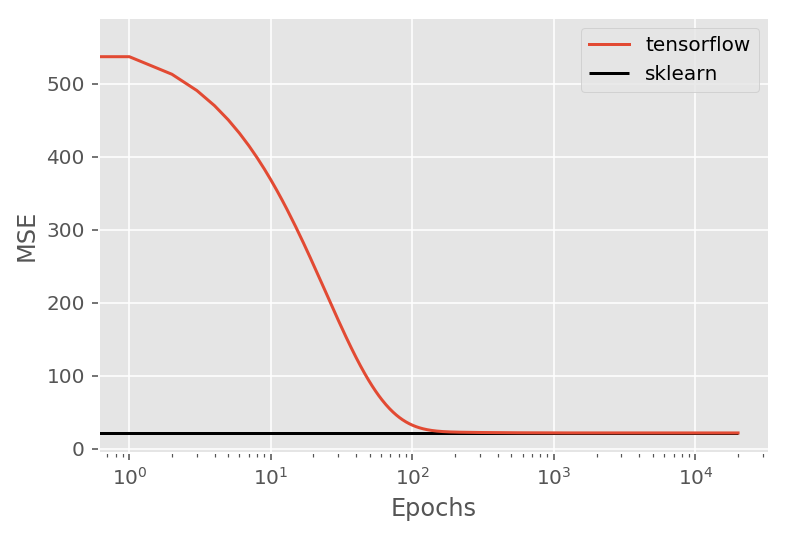

In [37]:
plt.plot(list(range(training_epochs)) , cost_history, label='tensorflow')
plt.hlines(boston_mse, 0, training_epochs, label='sklearn')
plt.xscale('log')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

<a id="train-a-multilayer-perceptron-on-the-titanic-data"></a>
## Train a Multilayer Perceptron on the Titanic data
---

- A feedforward multilayer perceptron is one of the most well known neural network architectures
- They are structured just like the picture in the intro
    - We have an input layer of features
    - These input features are passed into neurons in the hidden layers
    - Each neuron is a perceptron, kind of like a bunch of small linear regressions
    - We pass information from one layer of neurons to the next layer of neurons until we hit the output layer
    - The output layer does one calculation to output a prediction of our outome

![](./assets/images/neuralnet.png)

<a id="load-in-the-titanic-data"></a>
### Load in the titanic data

In [38]:
data = pd.read_csv('assets/datasets/titanic_train.csv')
X = data.drop('Survived', axis=1)
y = data[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<a id="do-a-bit-of-data-cleaning"></a>
### Do a bit of data cleaning

In [39]:
# Create a helper class to extract features one by one in a pipeline

class FeatureExtractor(TransformerMixin):

    def __init__(self, column):
        self.column = column
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x, y=None):
        return x[self.column].values.reshape(-1, 1)
    
    
FeatureExtractor('Fare').fit_transform(X_train)[0:5]

array([[51.8625],
       [15.5   ],
       [41.5792],
       [14.4542],
       [10.5167]])

The sklearn `LabelBinarizer` does not fit in a pipeline, let's use [this](https://github.com/scikit-learn/scikit-learn/issues/3112) customized version instead:

In [40]:
from sklearn.base import BaseEstimator

class CustomBinarizer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None,**fit_params):
        return self
    
    def transform(self, X):
        return LabelBinarizer().fit(X).transform(X)

In [41]:
# Create a pipeline to binarize labels and impute missing values with an appropriate method
pclass_pipe = make_pipeline(
    FeatureExtractor('Pclass'),
    CustomBinarizer(),
    Imputer(strategy='most_frequent'),
    StandardScaler()
)
sex_pipe = make_pipeline(
    FeatureExtractor('Sex'),
    CustomBinarizer(),
    Imputer(strategy='most_frequent'),
    StandardScaler()
)
age_pipe = make_pipeline(
    FeatureExtractor('Age'),
    Imputer(strategy='mean'),
    StandardScaler()
)
sibsp_pipe = make_pipeline(
    FeatureExtractor('SibSp'),
    Imputer(strategy='most_frequent'),
    StandardScaler()
)
parch_pipe = make_pipeline(
    FeatureExtractor('Parch'),
    Imputer(strategy='most_frequent'),
    StandardScaler()
)

fu = make_union(pclass_pipe, sex_pipe, 
                age_pipe, sibsp_pipe, parch_pipe)

In [42]:
print(fu.fit_transform(X_train)[0:5])

[[ 1.8479e+00 -5.1516e-01 -1.1368e+00  7.2678e-01  1.8922e+00 -4.6984e-01
  -4.6399e-01]
 [-5.4115e-01 -5.1516e-01  8.7966e-01  7.2678e-01 -2.7468e-16 -4.6984e-01
  -4.6399e-01]
 [-5.4115e-01  1.9411e+00 -1.1368e+00  7.2678e-01 -3.4993e-01  3.4418e-01
   2.0162e+00]
 [-5.4115e-01 -5.1516e-01  8.7966e-01  7.2678e-01 -2.7262e-01  3.4418e-01
  -4.6399e-01]
 [-5.4115e-01 -5.1516e-01  8.7966e-01 -1.3759e+00 -5.8188e-01 -4.6984e-01
  -4.6399e-01]]


In [43]:
# Create X, y, train, and test

def multi_binarizer(data):
    
    data = data.copy()
    data['Survived Class 0'] = data['Survived'].apply(lambda x: 1 if x == 0 else 0)

    return data[['Survived Class 0', 'Survived']].values

train_X = fu.transform(X_train)
train_Y = multi_binarizer(y_train)
test_X = fu.transform(X_test)
ttest_Y = multi_binarizer(y_test)

<a id="create-tensors"></a>
### Create tensors

In [44]:
n_input = train_X.shape[1]
n_train = train_X.shape[0]
n_classes = 2

x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

<a id="create-weights"></a>
### Create weights

In [45]:
# Define the number of neurons in each hidden layer
n_hidden_1 = 4
n_hidden_2 = 4

In [46]:
stddev = 0.1

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev=stddev)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=stddev)),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev=stddev))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

<a id="create-the-structure-of-the-multilayer-perceptron-network"></a>
### Create the structure of the Multilayer Perceptron network
- This is very similar to what we did in linear regression
    - `tf.add(tf.matmul(x, weights['h1']), biases['b1'])` is nearly identical
- There are two major changes
    - We now use a dictionary to make it easier to access our weight
    - We wrap the output from each layer in a ReLu function, `tf.nn.relu()`
- Each layer is fed directly into the next layer, which is why we call it a feed-forward network
    
    
Note: ReLu functions have come into popularity lately because  the linear part of the function helps us avoid the [vanishing gradient](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) problem.

In [47]:
def multilayer_perceptron(x, weights, biases):
    
    # Layer 1, ReLU activation
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    
    # Layer 2, ReLU activation
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    
    return tf.matmul(layer_2, weights['out']) + biases['out']

In [48]:
pred = multilayer_perceptron(x, weights, biases)

The setup of the layer structure could be even further simplified using the command `tf.layers.dense` which carries out the matrix multiplication given the input data, the current layer and the activation function.

<a id="define-loss-function"></a>
### Define loss function
- Now we have a classification problem
- Cross-entropy is the same loss function as the one used in logistic regression

In [49]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))

<a id="define-optimizer"></a>
### Define optimizer

In [50]:
optm = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

<a id="train-the-network"></a>
### Train the network
- We've changed the training procedure a little
- We've added a batch_size.
    - This is a trick to make optimization faster
    - Rather than using all of our samples on every epoch to train the network, we sample observations
    - This reduces the computation time, without a heavy impact on the optimization procedure

In [51]:
learning_rate = 0.001 # A weight to determine how fast the network is trained
training_epochs = 2500 # How many times we update the weights by the learning_rate
batch_size = 50 # How many samples of data we use at a time to compute the update
display_step = 100 # How often

correct = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
init = tf.global_variables_initializer()

In [52]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_train/batch_size)
        
        for i in range(total_batch):
            random_index = np.random.randint(n_train, size=batch_size)
            batch_xs = train_X[random_index, :]
            batch_ys = train_Y[random_index, :]
            sess.run(optm, feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += sess.run(cost,
                feed_dict={x: batch_xs, y: batch_ys})/total_batch

        if epoch % display_step == 0:
            print(("Epoch: %03d/%03d cost: %.9f" % 
                   (epoch, training_epochs, avg_cost)))
            train_accuracy = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys})
            print((" Training accuracy: %.3f" % (train_accuracy)))
        
    predictions = sess.run(tf.argmax(pred, 1), feed_dict={x:test_X})

Epoch: 000/2500 cost: 0.827605014
 Training accuracy: 0.440
Epoch: 100/2500 cost: 0.653071268
 Training accuracy: 0.660
Epoch: 200/2500 cost: 0.561977682
 Training accuracy: 0.780
Epoch: 300/2500 cost: 0.476022038
 Training accuracy: 0.800
Epoch: 400/2500 cost: 0.431074825
 Training accuracy: 0.800
Epoch: 500/2500 cost: 0.462989246
 Training accuracy: 0.720
Epoch: 600/2500 cost: 0.485482728
 Training accuracy: 0.680
Epoch: 700/2500 cost: 0.507726504
 Training accuracy: 0.860
Epoch: 800/2500 cost: 0.464836917
 Training accuracy: 0.760
Epoch: 900/2500 cost: 0.462425592
 Training accuracy: 0.880
Epoch: 1000/2500 cost: 0.443990025
 Training accuracy: 0.860
Epoch: 1100/2500 cost: 0.464785161
 Training accuracy: 0.820
Epoch: 1200/2500 cost: 0.435925847
 Training accuracy: 0.800
Epoch: 1300/2500 cost: 0.450564658
 Training accuracy: 0.800
Epoch: 1400/2500 cost: 0.451553889
 Training accuracy: 0.840
Epoch: 1500/2500 cost: 0.444503408
 Training accuracy: 0.880
Epoch: 1600/2500 cost: 0.459707593

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['Survived'], predictions)

0.8305084745762712

<a id="a-final-example-with-more-hidden-layers"></a>
### A final example with more hidden layers

With more complex neural networks, appropriate training also becomes more difficult. In particular, one has to initialize suitable values for the model coefficients before starting the optimization procedure. Usually one takes some random values, e.g. from a normal distribution, but success depends on the choice of the shape parameters for that normal distribution. 
Empirical recommendations how to set the shape parameters for parameters in each layer are related to the number of input and output parameters in each layer and the type of activation function.

A famous scheme according to [Glorot and Bengio](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf?hc_location=ufi) known as Xavier initialization recommends the following in the case of a RELU activation function.

In [54]:
def std_init(n_inputs,n_outputs):
    std = 2/(n_inputs+n_outputs)**0.5
    return std

In [55]:
learning_rate = 0.0005
training_epochs = 7500
batch_size = 50
display_step = 500

n_hidden_1 = 8
n_hidden_2 = 8
n_hidden_3 = 8
n_input = train_X.shape[1]
n_train = train_X.shape[0]
n_classes = 2

x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

def multilayer_perceptron(x, weights, biases):
    
    # Layer 1, ReLU activation, 4 neurons
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    
    # Layer 2, ReLU activation, 4 Neurons
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    
    # Layer 3, ReLu activation, 4 Neurons
    layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']))
    
    return tf.matmul(layer_3, weights['out']) + biases['out']

np.random.seed(1)
stddev = 0.01

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev=std_init(n_input,n_hidden_1))),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=std_init(n_hidden_1,n_hidden_2))),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3], stddev=std_init(n_hidden_2,n_hidden_3))),
    'out': tf.Variable(tf.random_normal([n_hidden_3, n_classes], stddev=std_init(n_hidden_3,n_classes)))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1],stddev=stddev)),
    'b2': tf.Variable(tf.random_normal([n_hidden_2],stddev=stddev)),
    'b3': tf.Variable(tf.random_normal([n_hidden_3],stddev=stddev)),
    'out': tf.Variable(tf.random_normal([n_classes],stddev=stddev))
}

pred = multilayer_perceptron(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optm = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# We also set up some helper functions

correct = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

In [56]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    cost_counter = []

    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_train/batch_size)
        
        for i in range(total_batch):
            random_index = np.random.randint(n_train, size=batch_size)
            batch_xs = train_X[random_index, :]
            batch_ys = train_Y[random_index, :]
            sess.run(optm, feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += sess.run(cost,
                feed_dict={x: batch_xs, y: batch_ys})/total_batch

        cost_counter.append(avg_cost)

        if epoch % display_step == 0:
            print(("Epoch: %03d/%03d cost: %.9f" % 
                   (epoch, training_epochs, avg_cost)))
            train_accuracy = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys})
            print((" Training accuracy: %.3f" % (train_accuracy)))

    predictions = sess.run(tf.argmax(pred, 1), feed_dict={x:test_X})

Epoch: 000/7500 cost: 1.880004417
 Training accuracy: 0.420
Epoch: 500/7500 cost: 0.505275599
 Training accuracy: 0.820
Epoch: 1000/7500 cost: 0.474435478
 Training accuracy: 0.760
Epoch: 1500/7500 cost: 0.450365844
 Training accuracy: 0.760
Epoch: 2000/7500 cost: 0.460177958
 Training accuracy: 0.780
Epoch: 2500/7500 cost: 0.423508725
 Training accuracy: 0.840
Epoch: 3000/7500 cost: 0.409562619
 Training accuracy: 0.840
Epoch: 3500/7500 cost: 0.416742997
 Training accuracy: 0.860
Epoch: 4000/7500 cost: 0.404711271
 Training accuracy: 0.840
Epoch: 4500/7500 cost: 0.389991086
 Training accuracy: 0.900
Epoch: 5000/7500 cost: 0.388869310
 Training accuracy: 0.800
Epoch: 5500/7500 cost: 0.369624978
 Training accuracy: 0.900
Epoch: 6000/7500 cost: 0.370073982
 Training accuracy: 0.800
Epoch: 6500/7500 cost: 0.376839765
 Training accuracy: 0.820
Epoch: 7000/7500 cost: 0.373657056
 Training accuracy: 0.820


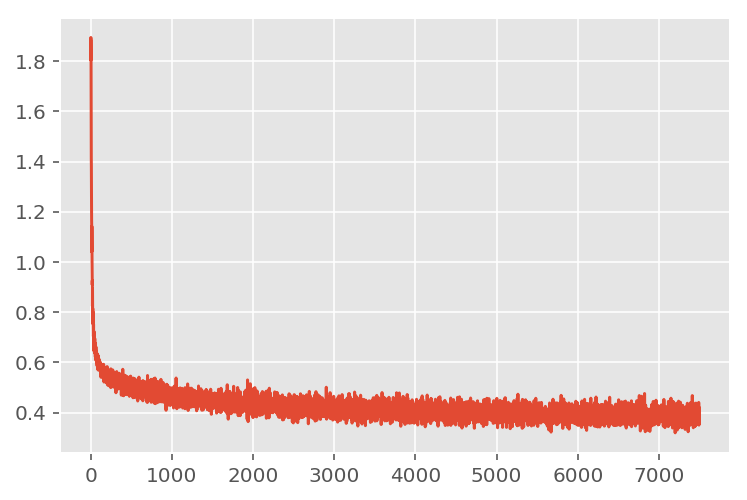

In [57]:
plt.plot(list(range(training_epochs)), cost_counter)
plt.show()

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['Survived'], predictions)

0.8169491525423729

<a id="additionl-resources"></a>
## Additional Resources
---

- [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html)
- [Deep Learning](http://www.deeplearningbook.org/)
- [Tensorflow Tutorials](https://github.com/pkmital/tensorflow_tutorials)
- [Awesome Tensorflow](https://github.com/jtoy/awesome-tensorflow)
- [Tensorflow Examples](https://github.com/aymericdamien/TensorFlow-Examples)
- [Hands-on Machine Learning with ScikitLearn and TensorFlow](https://github.com/ageron/handson-ml)
- [Mind: How to Build a Neural Network](https://stevenmiller888.github.io/mind-how-to-build-a-neural-network/)